In [1]:
import requests

In [2]:
url = f"https://dadosabertos.turismodeportugal.pt/api/download/v1/items/4e62eb1977564991bd01e61d7aa8266f/csv?layers=6"

response = requests.get(url)

if response.status_code == 200:
    data = response.text           # Transforma para texto o ficheiro csv obtido da url
    print("Dados obtidos com sucesso")
else:
    print(f"Erro na requisição {response.status_code}")

Dados obtidos com sucesso


In [3]:
import io
import pandas as pd

df = pd.read_csv(io.StringIO(data))     # io.StringIO para ler a data obtida
df.head()

,ï»¿X,Y,OBJECTID,NrRNAL,Denominacao,DataRegisto,DataAberturaPublico,Modalidade,NrUtentes,Email,...,LOCALIDADE,LatLong,FiabilidadeGeo,Freguesia,Concelho,Distrito,NUTSIII,NUTSII,ERT,SeloCleanSafe
0,-871301.8846,4.448274e+06,1,1,Figo,2014/12/03 09:47:03+00,2014/12/03 00:00:00+00,Apartamento,4,info@cochichosfarm.com,...,Igreja,"37,0657410006129 ; -7,82703800016578",NaoFiavel,Quelfes,OlhÃ£o,Faro,Algarve,Algarve,RegiÃ£o de Turismo do Algarve,NÃ£o
1,-873243.5191,4.447906e+06,2,2,Casa EsperanÃ§a,2013/07/30 00:00:00+00,2013/07/30 00:00:00+00,Moradia,4,ana-kaisa_herlevi@kirkkonummi.fi,...,PoÃ§o Longo,"37,0631040005519 ; -7,84447999958415",NaoFiavel,Quelfes,OlhÃ£o,Faro,Algarve,Algarve,RegiÃ£o de Turismo do Algarve,NÃ£o
2,-851399.3893,4.456996e+06,3,3,Maria da ConceiÃ§Ã£o Machado Rodrigues,2014/11/27 08:39:27+00,2014/12/05 00:00:00+00,Apartamento,4,mariacmachado3@gmail.com,...,Tavira,"37,1282358204969 ; -7,64825084271288",NaoFiavel,UniÃ£o das freguesias de Tavira (Santa Maria e...,Tavira,Faro,Algarve,Algarve,RegiÃ£o de Turismo do Algarve,NÃ£o
3,-828737.7288,4.896032e+06,4,4,Bio-Turismo Casa da Eira,2014/08/06 00:00:00+00,2014/08/06 00:00:00+00,Apartamento,23,geral@casadaeira.org,...,PÃªro Viseu,"40,2067505368476 ; -7,44467768336503",NaoFiavel,PÃªro Viseu,FundÃ£o,Castelo Branco,Beiras e Serra da Estrela,Centro,Turismo do Centro de Portugal,NÃ£o
4,-995600.0418,4.440552e+06,5,5,Casa Jesus,2009/08/18 00:00:00+00,2009/08/18 00:00:00+00,Apartamento,4,mariaprjesus@gmail.com,...,Sagres,"37,0103645489463 ; -8,94362734418431",NaoFiavel,Sagres,Vila do Bispo,Faro,Algarve,Algarve,RegiÃ£o de Turismo do Algarve,NÃ£o


In [4]:
columns = ["DataAberturaPublico", "Modalidade", "NrUtentes", "LOCALIDADE", "Concelho", "Distrito", "NUTSIII"]
df2 = df.loc[: , columns]

In [5]:
df2.head()

,DataAberturaPublico,Modalidade,NrUtentes,LOCALIDADE,Concelho,Distrito,NUTSIII
0,2014/12/03 00:00:00+00,Apartamento,4,Igreja,OlhÃ£o,Faro,Algarve
1,2013/07/30 00:00:00+00,Moradia,4,PoÃ§o Longo,OlhÃ£o,Faro,Algarve
2,2014/12/05 00:00:00+00,Apartamento,4,Tavira,Tavira,Faro,Algarve
3,2014/08/06 00:00:00+00,Apartamento,23,PÃªro Viseu,FundÃ£o,Castelo Branco,Beiras e Serra da Estrela
4,2009/08/18 00:00:00+00,Apartamento,4,Sagres,Vila do Bispo,Faro,Algarve


In [6]:
df2.dtypes

DataAberturaPublico    object
Modalidade             object
NrUtentes               int64
LOCALIDADE             object
Concelho               object
Distrito               object
NUTSIII                object
dtype: object

In [7]:
df2["DataAberturaPublico"] = pd.to_datetime(df2["DataAberturaPublico"], errors = "coerce")

df2.rename(columns = {"DataAberturaPublico" : "OpenData"}, inplace = True)

df2["OpenYear"] = pd.DatetimeIndex(df2["OpenData"]).year

df2.dtypes

OpenData      datetime64[ns, UTC]
Modalidade                 object
NrUtentes                   int64
LOCALIDADE                 object
Concelho                   object
Distrito                   object
NUTSIII                    object
OpenYear                    int32
dtype: object

In [8]:
df2.head()

,OpenData,Modalidade,NrUtentes,LOCALIDADE,Concelho,Distrito,NUTSIII,OpenYear
0,2014-12-03 00:00:00+00:00,Apartamento,4,Igreja,OlhÃ£o,Faro,Algarve,2014
1,2013-07-30 00:00:00+00:00,Moradia,4,PoÃ§o Longo,OlhÃ£o,Faro,Algarve,2013
2,2014-12-05 00:00:00+00:00,Apartamento,4,Tavira,Tavira,Faro,Algarve,2014
3,2014-08-06 00:00:00+00:00,Apartamento,23,PÃªro Viseu,FundÃ£o,Castelo Branco,Beiras e Serra da Estrela,2014
4,2009-08-18 00:00:00+00:00,Apartamento,4,Sagres,Vila do Bispo,Faro,Algarve,2009


In [9]:
# only values after 2000's
after_2000 = df2[df2["OpenData"]> "2000-01-01"]

In [10]:
# unique values from this PandasSeries
regions = after_2000["NUTSIII"].unique()
regions

array(['Algarve', 'Beiras e Serra da Estrela', 'Grande Lisboa',
       'Viseu DÃ£o LafÃµes', 'Alentejo Central',
       'Ã\x81rea Metropolitana do Porto', 'TÃ¢mega e Sousa',
       'Beira Baixa', 'Alto Minho', 'RegiÃ£o de Coimbra', 'Oeste',
       'Alentejo Litoral', 'Alto TÃ¢mega e Barroso', 'MÃ©dio Tejo',
       'Alto Alentejo', 'RegiÃ£o de Aveiro', 'RegiÃ£o de Leiria', 'Douro',
       'Ave', 'PenÃ\xadnsula de SetÃºbal', 'Baixo Alentejo',
       'LezÃ\xadria do Tejo', 'CÃ¡vado', 'Terras de TrÃ¡s-os-Montes'],
      dtype=object)

In [11]:
count = after_2000["NUTSIII"].value_counts().sort_values(ascending = False)
count

NUTSIII
Algarve                         44192
Grande Lisboa                   25139
Ãrea Metropolitana do Porto    13753
Oeste                            6292
PenÃ­nsula de SetÃºbal           4271
Alto Minho                       2276
Alentejo Litoral                 2218
RegiÃ£o de Coimbra               2009
CÃ¡vado                          1937
RegiÃ£o de Aveiro                1620
Beiras e Serra da Estrela        1197
Alentejo Central                 1176
TÃ¢mega e Sousa                  1114
Ave                              1098
Douro                            1000
RegiÃ£o de Leiria                 919
MÃ©dio Tejo                       915
Alto Alentejo                     703
Viseu DÃ£o LafÃµes                647
Terras de TrÃ¡s-os-Montes         498
Baixo Alentejo                    490
LezÃ­ria do Tejo                  474
Beira Baixa                       353
Alto TÃ¢mega e Barroso            325
Name: count, dtype: int64

#### Gráfico distribuição de alojamentos por região

<Axes: title={'center': 'Número de AL por região'}, xlabel='NUTSIII'>

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


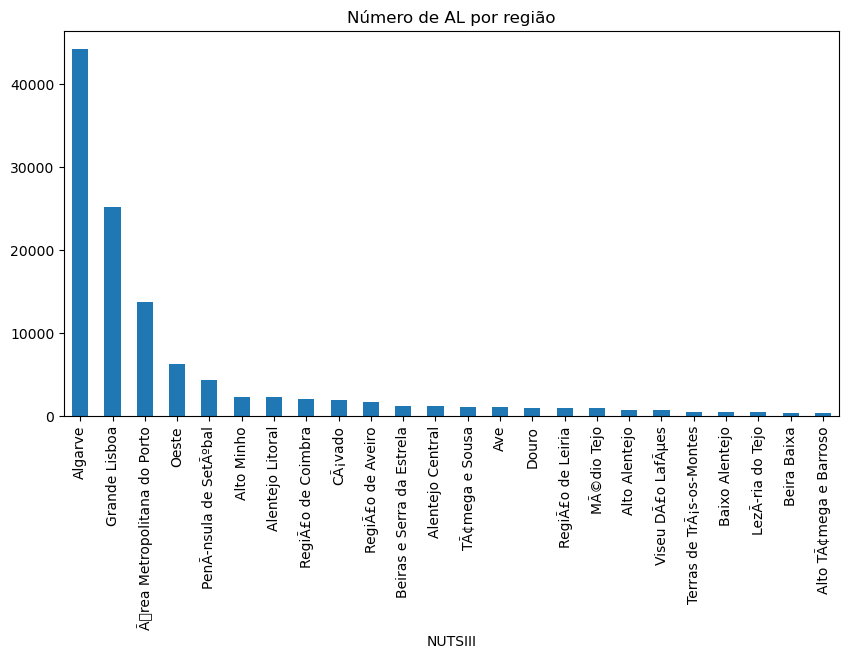

In [13]:
after_2000["NUTSIII"].value_counts().plot(kind = "bar", figsize = (10,5), title ="Número de AL por região")

#### Gráfico evolução das 3 regiões que mais cresceram

In [15]:
after_2000 = after_2000[after_2000["OpenYear"] < 2025]

<Axes: title={'center': 'Evolução Top 3 Regiões'}, xlabel='OpenYear'>

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


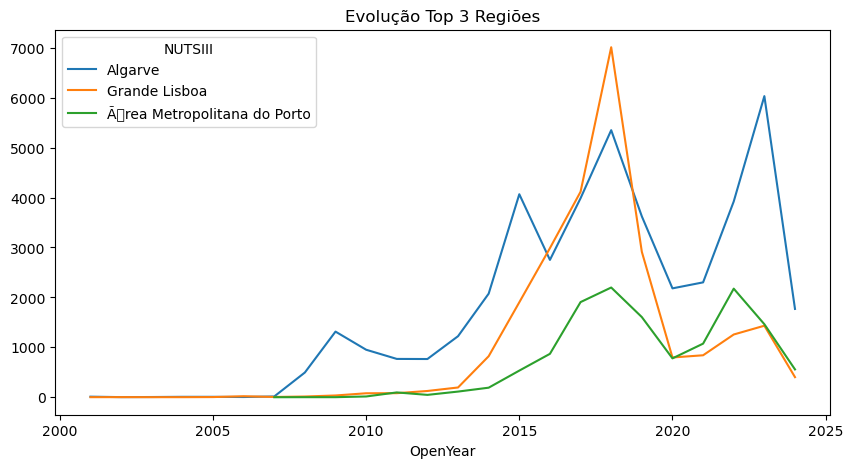

In [16]:
top_tres = after_2000["NUTSIII"].value_counts().head(3).index
df_filtred = after_2000[after_2000["NUTSIII"].isin(top_tres)]

df_regioes_grouped = df_filtred.groupby(["OpenYear","NUTSIII"]).size().unstack()

df_regioes_grouped.plot(kind = "line", figsize = (10,5) , title = "Evolução Top 3 Regiões")